In [1]:
library(igraph)
library("readxl")


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



In [2]:
df<-read_excel("/home/diego/Documentos/PiedrasTDA/MatrizAdyacencia_Fractura_(8).xlsx",col_names=FALSE)

In [6]:
df<-data.frame(df)

In [7]:
dim(df)

[1] 67 67

In [8]:
a=as.matrix(df)

In [9]:
graph=graph_from_adjacency_matrix(a,mode="undirected")

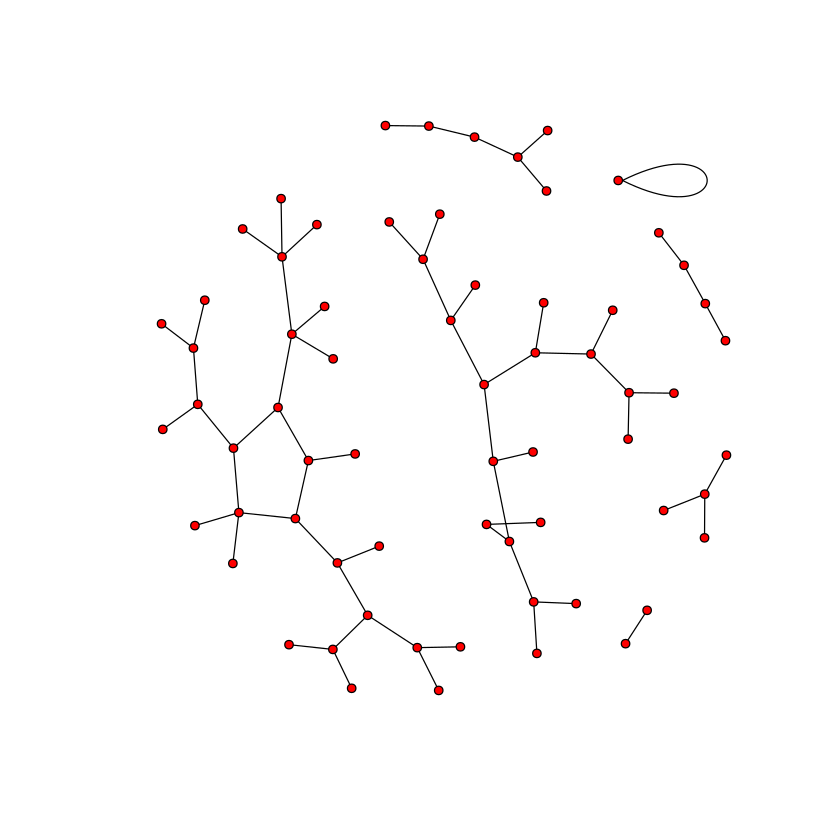

In [10]:
plot.igraph(graph,vertex.color="red",vertex.size=3,edge.color="black",vertex.label=NA)

In [11]:
#Carga todos los archivos
ruta<-"/home/diego/Documentos/PiedrasTDA/"

In [12]:
archivos=list.files(path = ruta, pattern = "Matriz", all.files = FALSE,
             full.names = FALSE, recursive = FALSE,
             ignore.case = FALSE, include.dirs = FALSE, no.. = FALSE)

In [13]:
archivos=purrr::discard(archivos,.p = ~stringr::str_detect(.x,"MatrizAdyacencia_MuestraDeMano.xlsx"))

In [14]:
length(archivos)

[1] 24

In [15]:
matrices=list()
for(i in 1:length(archivos)){
    df<-read_excel(paste(ruta,archivos[i],sep=""),col_names=FALSE)
    aux=list(df,archivos[i])
    matrices[[i]]<-aux
}

In [16]:
#funcion que regresa las graficas
graphs<-function(lista){
    graphs<-list()
    for(i in 1:length(lista)){
        M=as.matrix(lista[[i]][[1]])
        graph=graph_from_adjacency_matrix(M,mode="undirected")
        aux=list(graph,lista[[i]][[2]])
        graphs[[i]]<-aux
    }
    return(graphs)
}

#Función que regresa el grado por vertice de una gráfica la función. Ingresa matriz de adyacencia(tipo list)
#Regresa una lista de los vertices con sus grados
grado<-function(matrizlist){
    tam=length(matrizlist)
    result=list()
    for(i in 1:tam){
        result[[i]]<-sum(matrizlist[[i]])
    }
    return(result)
}


In [17]:
#length(matrices[[18]][[1]])
#(grado(matrices[[18]][[1]]))

In [18]:

#Generador de gráficas dado el parámetro promedio
generator2<-function(prome,n){
    gra<-make_empty_graph(directed=FALSE) #Crea la gráfica vacia
    gra<-add.vertices(gra,n) #Agrega los vertices
    k<-0 #Variable auxiliar
    kn<-0 #Variable que adquiere el promedio
    while(kn<prome){   #mientras el kn sea menos al promedio dado
        for(i in 1:n){  
            for(j in i:n){
                if (i!=j){ #no permite bucles
                    gra<-add.edges(gra,c(i,j)) #Agrega una arista en los vertices i,j
                    d<-get.adjacency(gra)      #Recupera la matriz de adyacencia
                    f=list(as.matrix(d),"g")   #genera una lista con l matriz de adyacencia y un caracter
                    k=prome(grado(f))  #obtiene el promedio del grado
                    if (k>kn){                 #compara el valor con lo anterior. si es mayor deja la arista si no la quita
                        kn<-k                  
                    }                          
                    else{
                        gra<-delete.edges(gra,paste(as.character(i),"|",as.character(j))) #Borra la arista
                    }
                }
                
            }
            
        }
        
    }   
    plot.igraph(gra,vertex.color="red",edge.color="black",vertex.size=4,vertex.label=NA)
    print(kn)
}

In [19]:
r=8
c=3
g=graphs(matrices)


In [20]:
length(matrices)

[1] 24

In [21]:
paste(archivos[1],"a",sep="")

[1] "MatrizAdyacencia_Fractura_(105).xlsxa"

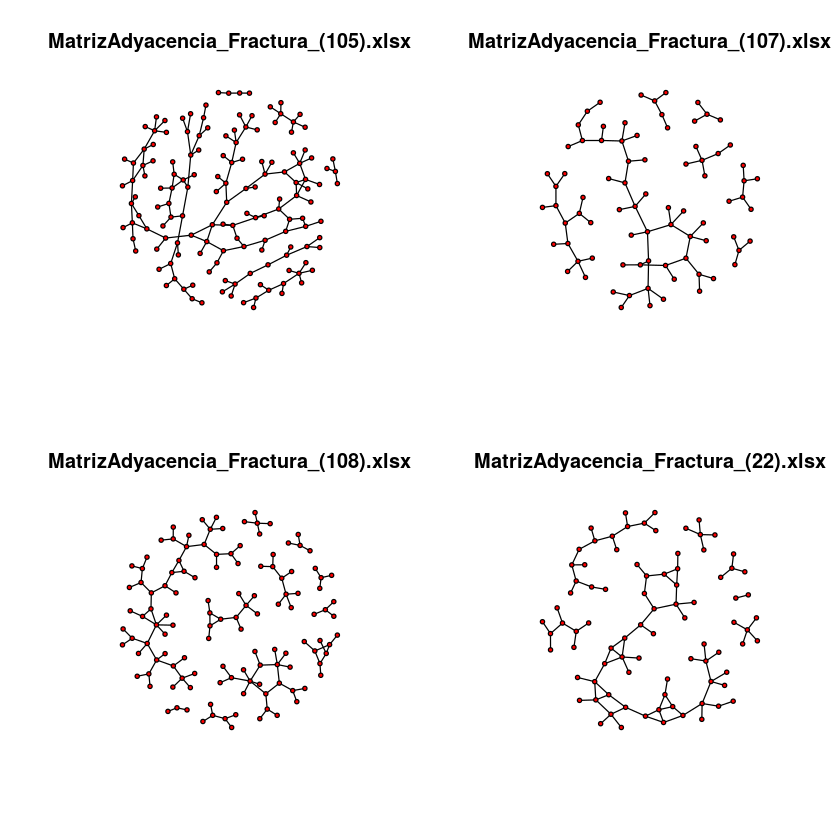

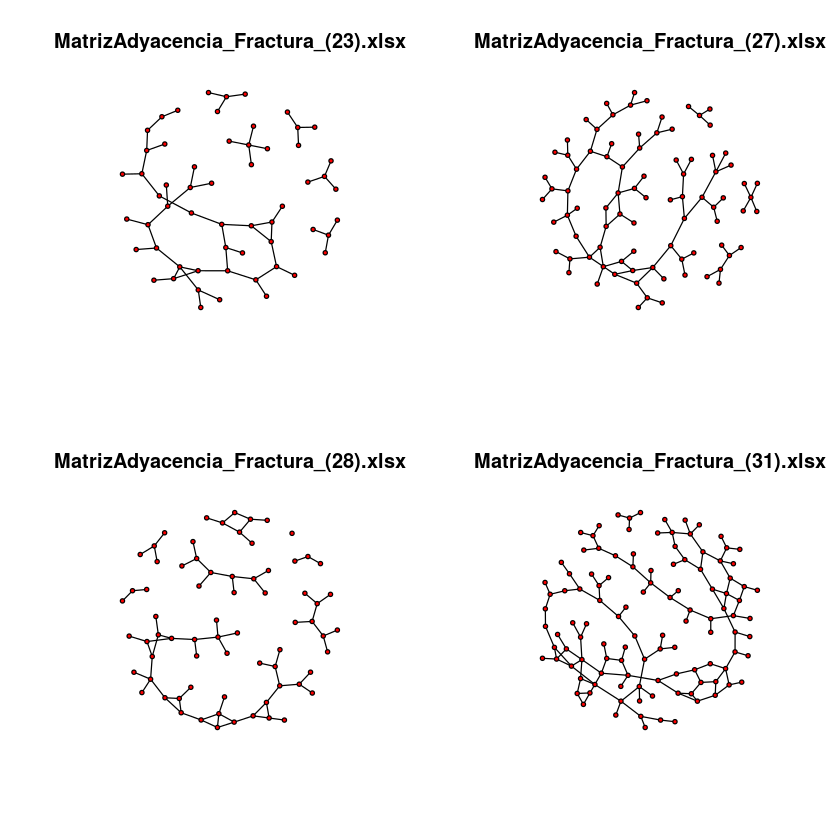

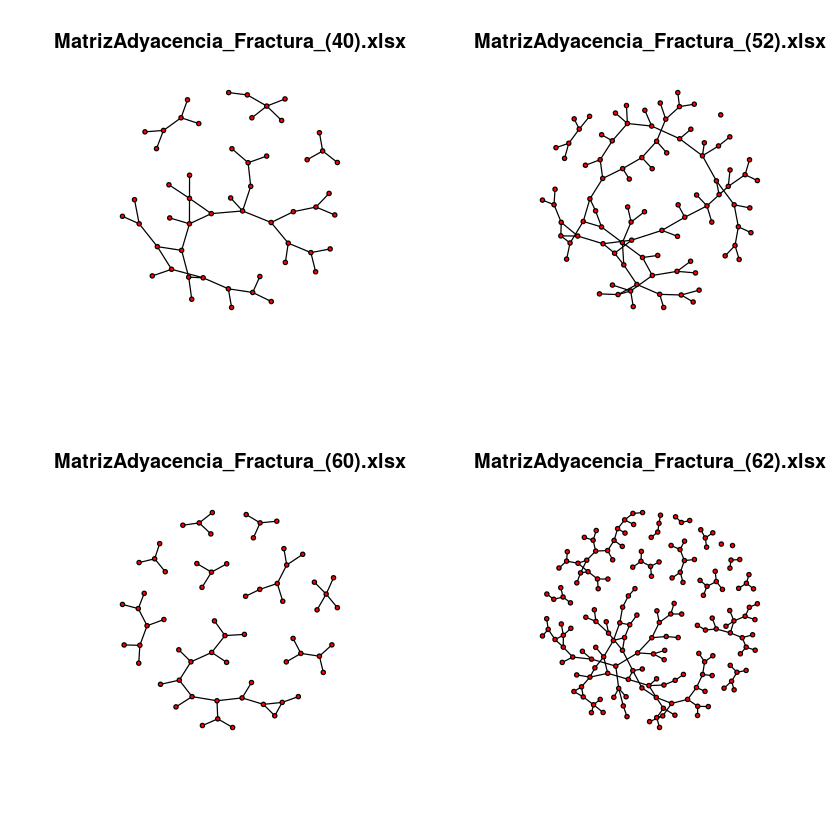

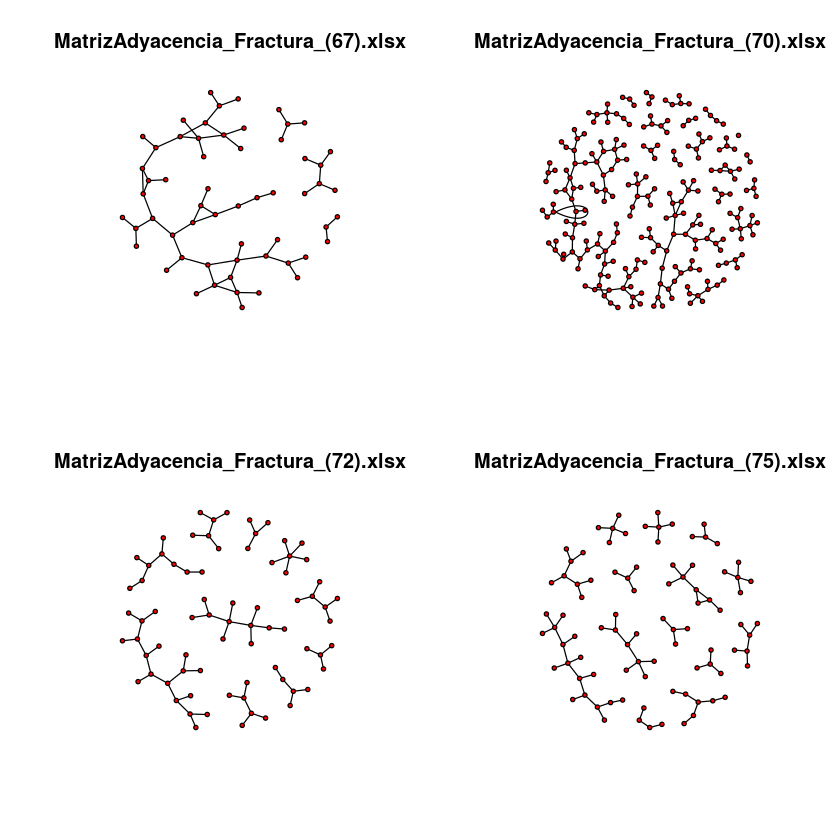

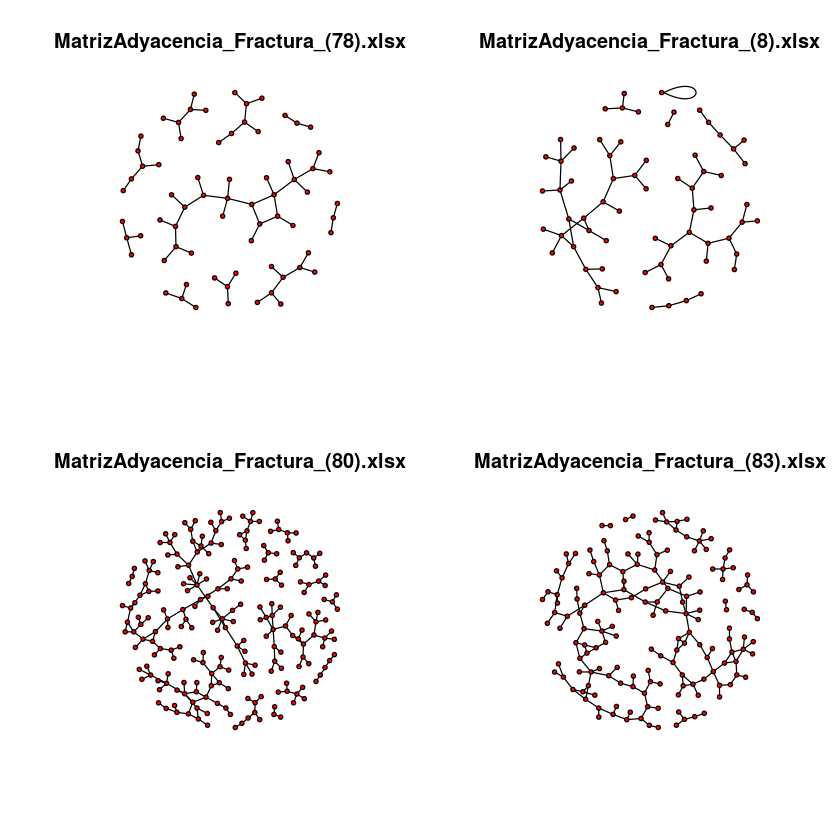

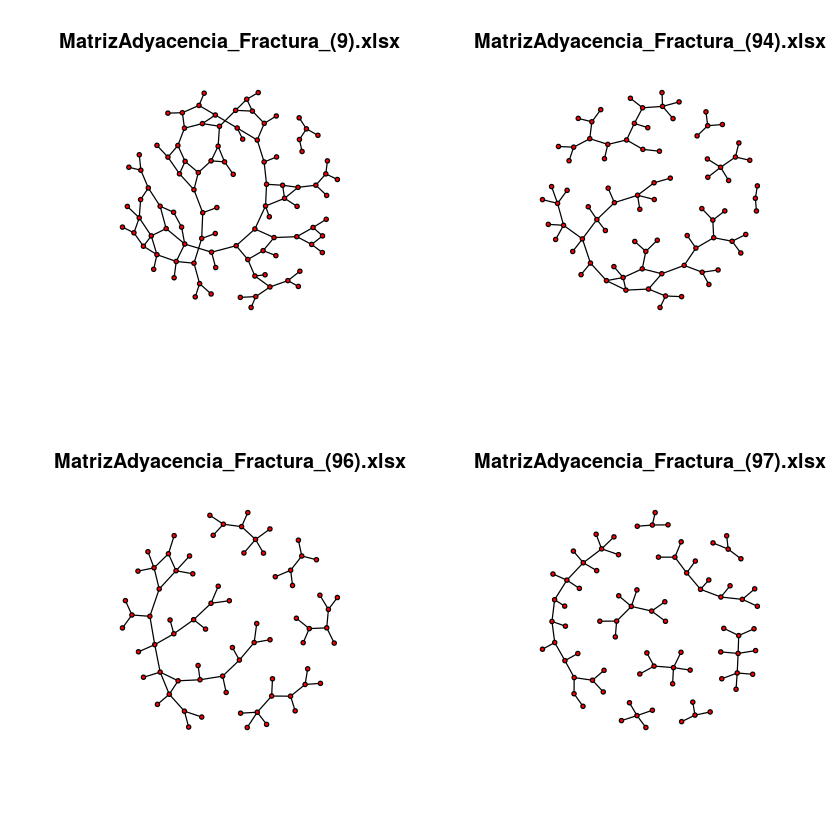

In [22]:
par(mfrow = c(2,2))
for(i in 1:length(g)){
    plot.igraph(g[[i]][[1]],vertex.color="red",vertex.size=4,edge.color="black",vertex.label=NA,main=g[[i]][[2]])    
}

# Metricas

## Energía
$$
E(G)=\sum_{i=0}^{n}|\lambda_i|
$$

In [23]:
#Recibe los eigenvalores de la matriz asociada a una gráfica G
#Devuelve la energía de la gráfica.
energy<-function(lista){
    ener=0
    for(i in 1:length(lista[[1]])){
     ener=ener+abs((lista[[1]][[i]]))
    }
    return(ener)
}

In [24]:
val<-eigen(matrices[[18]][[1]])
energy(val)

[1] 72.06734

In [25]:
# Energía de todas las gráficas
for(i in 1:length(matrices)){
    cat(matrices[[i]][[2]],energy(eigen(matrices[[i]][[1]])),sep="\n")
}

MatrizAdyacencia_Fractura_(105).xlsx
165.2809
MatrizAdyacencia_Fractura_(107).xlsx
84.23375
MatrizAdyacencia_Fractura_(108).xlsx
131.4662
MatrizAdyacencia_Fractura_(22).xlsx
96.54088
MatrizAdyacencia_Fractura_(23).xlsx
62.81796
MatrizAdyacencia_Fractura_(27).xlsx
94.80823
MatrizAdyacencia_Fractura_(28).xlsx
78.16044
MatrizAdyacencia_Fractura_(31).xlsx
139.1006
MatrizAdyacencia_Fractura_(40).xlsx
57.34826
MatrizAdyacencia_Fractura_(52).xlsx
106.7013
MatrizAdyacencia_Fractura_(60).xlsx
64.51086
MatrizAdyacencia_Fractura_(62).xlsx
197.6921
MatrizAdyacencia_Fractura_(67).xlsx
65.61276
MatrizAdyacencia_Fractura_(70).xlsx
243.364
MatrizAdyacencia_Fractura_(72).xlsx
76.42663
MatrizAdyacencia_Fractura_(75).xlsx
89.23464
MatrizAdyacencia_Fractura_(78).xlsx
73.22898
MatrizAdyacencia_Fractura_(8).xlsx
72.06734
MatrizAdyacencia_Fractura_(80).xlsx
235.5616
MatrizAdyacencia_Fractura_(83).xlsx
192.638
MatrizAdyacencia_Fractura_(9).xlsx
122.8331
MatrizAdyacencia_Fractura_(94).xlsx
87.02537
MatrizAdyac

## Energia promedio de todas las gráficas

In [53]:
for(i in 1:length(matrices)){
    cat(matrices[[i]][[2]],energy(eigen(matrices[[i]][[1]]))/length(matrices[[i]][[1]]),sep="\n")
}

MatrizAdyacencia_Fractura_(105).xlsx
1.12436
MatrizAdyacencia_Fractura_(107).xlsx
1.052922
MatrizAdyacencia_Fractura_(108).xlsx
1.05173
MatrizAdyacencia_Fractura_(22).xlsx
1.122568
MatrizAdyacencia_Fractura_(23).xlsx
1.083068
MatrizAdyacencia_Fractura_(27).xlsx
1.102421
MatrizAdyacencia_Fractura_(28).xlsx
1.100851
MatrizAdyacencia_Fractura_(31).xlsx
1.230979
MatrizAdyacencia_Fractura_(40).xlsx
1.082043
MatrizAdyacencia_Fractura_(52).xlsx
1.159796
MatrizAdyacencia_Fractura_(60).xlsx
1.023982
MatrizAdyacencia_Fractura_(62).xlsx
1.11063
MatrizAdyacencia_Fractura_(67).xlsx
1.131255
MatrizAdyacencia_Fractura_(70).xlsx
1.072088
MatrizAdyacencia_Fractura_(72).xlsx
1.019022
MatrizAdyacencia_Fractura_(75).xlsx
0.991496
MatrizAdyacencia_Fractura_(78).xlsx
1.046128
MatrizAdyacencia_Fractura_(8).xlsx
1.075632
MatrizAdyacencia_Fractura_(80).xlsx
1.070734
MatrizAdyacencia_Fractura_(83).xlsx
1.167503
MatrizAdyacencia_Fractura_(9).xlsx
1.253399
MatrizAdyacencia_Fractura_(94).xlsx
1.074387
MatrizAdyace

## Grado promedio 

In [27]:
#Recibe una lista con los grados por vertice de la gráfica.
#Regresa el promedio del grado.
prome<-function(listagrados,n){
    prom=0
    b<-data.frame(listagrados)
    for(i in 1:length(b)){
        for(j in b[[i]]){
            prom<-prom+j    
        }
    }
    return(prom/n)
}

In [33]:
length(data.frame(generator2.1(3,5)))

ERROR: Error in add.edges(gra, c(i, j)): At type_indexededgelist.c:272 : cannot add edges, Invalid vertex id


In [34]:

#for(i in 1:length(matrices)){
#    cat(prome(grado(matrices[[i]])),sep="\n")
#}
#grado(matrices[[1]])
matrices[[1]]

X__1,X__2,X__3,X__4,X__5,X__6,X__7,X__8,X__9,X__10,⋯,X__138,X__139,X__140,X__141,X__142,X__143,X__144,X__145,X__146,X__147
0,1,0,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,1,0,0,0,1,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,1,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,1,0,1,⋯,0,0,0,0,0,0,0,0,0,0
0,1,0,0,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0


## Ciclos impares

In [35]:
help(erdos.renyi.game)

In [36]:
a=erdos.renyi.game(67,0.035)
typeof(a)

[1] "list"

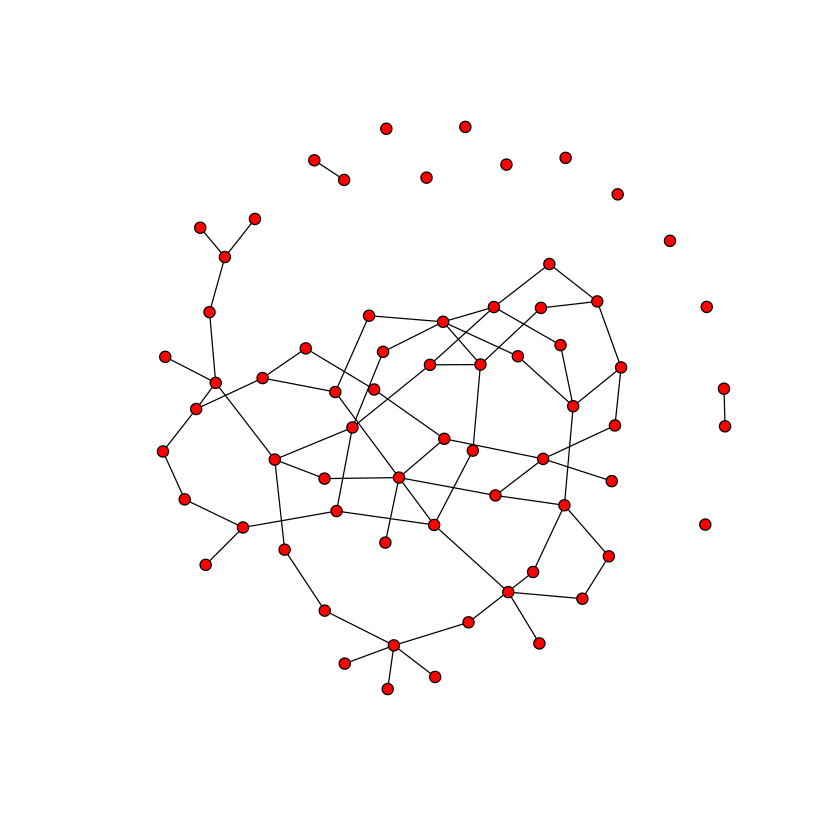

In [37]:
plot.igraph(a,vertex.color="red",edge.color="black",vertex.size=4,vertex.label=NA)

## Diametro y radio

In [38]:
#help(diameter)
#help(radius)
#Graph 18 (8)
graph=graph_from_adjacency_matrix(as.matrix(matrices[[23]][[1]]),mode="undirected")
diameter(graph,directed=FALSE,unconnected=TRUE)
radius(graph)

[1] 12

[1] 2

In [39]:
bfs(graph,1)

$root
[1] 1

$neimode
[1] "out"

$order
+ 73/73 vertices, named, from 3aa500c:
 [1] X__1  X__2  X__31 X__32 X__33 X__34 X__3  X__4  X__5  X__35 X__6  X__36
[13] X__37 X__38 X__39 X__8  X__11 X__12 X__44 X__45 X__7  X__13 X__46 X__10
[25] X__40 X__15 X__16 X__47 X__9  X__43 X__14 X__50 X__17 X__41 X__42 X__48
[37] X__49 X__18 X__51 X__21 X__52 X__27 X__56 X__66 X__67 X__19 X__20 X__22
[49] X__53 X__54 X__55 X__23 X__57 X__58 X__59 X__60 X__24 X__25 X__26 X__61
[61] X__62 X__63 X__64 X__65 X__28 X__29 X__68 X__69 X__70 X__30 X__71 X__72
[73] X__73

$rank
NULL

$father
NULL

$pred
NULL

$succ
NULL

$dist
NULL


In [40]:
dfs(graph,root=1)

$root
[1] 0

$neimode
[1] "out"

$order
+ 73/73 vertices, named, from 3aa500c:
 [1] X__1  X__2  X__33 X__34 X__31 X__32 X__3  X__4  X__6  X__5  X__38 X__39
[13] X__8  X__11 X__44 X__45 X__12 X__7  X__10 X__9  X__41 X__42 X__43 X__40
[25] X__13 X__15 X__14 X__48 X__49 X__16 X__17 X__18 X__21 X__27 X__66 X__67
[37] X__56 X__52 X__51 X__50 X__47 X__46 X__36 X__37 X__35 X__19 X__20 X__54
[49] X__55 X__22 X__23 X__58 X__59 X__60 X__57 X__53 X__24 X__25 X__62 X__63
[61] X__26 X__64 X__65 X__61 X__28 X__29 X__30 X__72 X__73 X__71 X__68 X__69
[73] X__70

$order.out
NULL

$father
NULL

$dist
NULL


## Pruebas de generación

In [41]:
#help(erdos.renyi.game)}

In [42]:
#Generador de gráficas dado el parámetro energía
generator<-function(energy,n,e){
    gra<-make_empty_graph(directed=FALSE)
    gra<-add.vertices(gra,n)
    k<-0
    kn<-0
    while (abs(energy-kn)>1){
        for(i in 1:n){
            for(j in i:n){
                if(i!=j){
                    gra<-add.edges(gra,c(i,j))
                    d<-get.adjacency(gra)
                    eg<-eigen(d)
                    k<-energy(eg)
                    if(k>=kn){
                        kn<-k
                    }
                    else{
                        gra<-delete.edges(gra,seq(j,j))
                    }
                }
            }
        }
        
    } 
    plot.igraph(gra,vertex.color="red",edge.color="black",vertex.size=4,vertex.label=NA)
    print(kn)
}

[1] 72.06734

ERROR: Error in sum(matrizlist[[i]]): 'type' (character) de argumento no válido


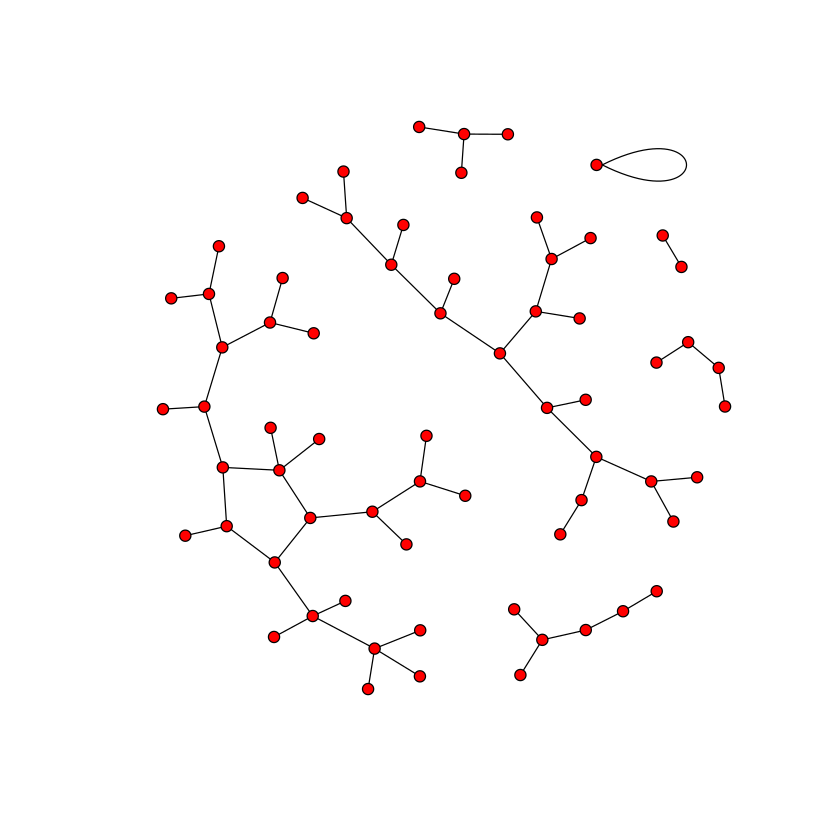

In [43]:
w=as.matrix(matrices[[18]][[1]])
W=graph_from_adjacency_matrix(w,mode="undirected")
plot.igraph(W,vertex.color="red",edge.color="black",vertex.size=4,vertex.label=NA)
energy(eigen(w))
prome(grado(matrices[[18]]))

In [44]:
#Generador de gráficas dado el parámetro energía
generator1<-function(energy,n,e){
    gra<-make_empty_graph(directed=FALSE)
    gra<-add.vertices(gra,n)
    k<-0
    kn<-0
    while(kn<energy){
        for(i in 1:n){
            for(j in i:n){
                if (i!=j){
                    gra<-add.edges(gra,c(i,j))
                    d<-get.adjacency(gra)
                    eg<-eigen(d)
                    k<-energy(eg)
                    if (k>kn){
                        kn<-k
                    }
                    else{
                        gra<-delete.edges(gra,paste(as.character(i),"|",as.character(j)))
                    }
                }
                
            }
            
        }
        
    }   
    plot.igraph(gra,vertex.color="red",edge.color="black",vertex.size=4,vertex.label=NA)
    print(kn)
}

[1] 255.3389


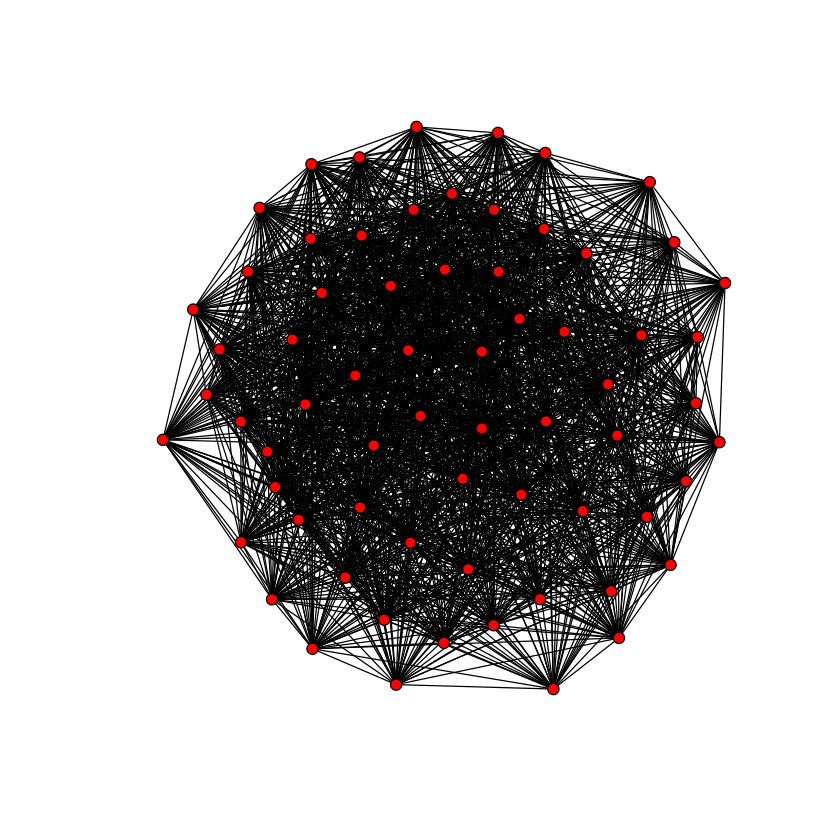

In [45]:
generator1(78,67,1)

## Intento con promedio de grado

In [46]:
#Generador de gráficas dado el parámetro promedio
generator2<-function(prome,n){
    gra<-make_empty_graph(directed=FALSE) #Crea la gráfica vacia
    gra<-add.vertices(gra,n) #Agrega los vertices
    k<-0 #Variable auxiliar
    kn<-0 #Variable que adquiere el promedio
    while(kn<prome){   #mientras el kn sea menos al promedio dado
        for(i in 1:n){  
            for(j in i:n){
                if (i!=j){ #no permite bucles
                    gra<-add.edges(gra,c(i,j)) #Agrega una arista en los vertices i,j
                    d<-get.adjacency(gra)      #Recupera la matriz de adyacencia
                    f=list(as.matrix(d),"g")   #genera una lista con l matriz de adyacencia y un caracter
                    k=prome(grado(f))  #obtiene el promedio del grado
                    if (k>kn){                 #compara el valor con lo anterior. si es mayor deja la arista si no la quita
                        kn<-k                  
                    }                          
                    else{
                        gra<-delete.edges(gra,paste(as.character(i),"|",as.character(j))) #Borra la arista
                    }
                }
                
            }
            
        }
        
    }   
    plot.igraph(gra,vertex.color="red",edge.color="black",vertex.size=4,vertex.label=NA)
    print(kn)
}

In [49]:
generator2(1.8,67)

ERROR: Error in sum(matrizlist[[i]]): 'type' (character) de argumento no válido


# PRUEBA 2 (PROMEDIO Y ENERGÍA)

In [50]:
#Generador de gráficas dado el parámetro promedio
generator2.1<-function(prome,n){
    gra<-make_empty_graph(directed=FALSE) #Crea la gráfica vacia
    gra<-add.vertices(gra,n) #Agrega los vertices
    k<-0 #Variable auxiliar
    kn<-0 #Variable que adquiere el promedio
    bandera<-FALSE
    while(bandera==FALSE){   #mientras el kn sea menos al promedio dado
        for(i in 1:n){  
            for(j in i:(i+1)){
                if (i!=j){ #no permite bucles
                    r<-runif(1,0,1)
                    if (r<0.5){
                    gra<-add.edges(gra,c(i,j)) #Agrega una arista en los vertices i,j
                        }
                    d<-get.adjacency(gra)      #Recupera la matriz de adyacencia
                    f=as.matrix(d)   #genera una lista con l matriz de adyacencia y un caracter
                    k=prome(grado(f),n)  #obtiene el promedio del grado
                    if (k>kn){                 #compara el valor con lo anterior. si es mayor deja la arista si no la quita
                        kn<-k                  
                    }                          
                    #else{
                     #   gra<-delete.edges(gra,paste(as.character(i),"|",as.character(j))) #Borra la arista
                    #}
                
                    if (abs(kn-prome)<=1){
                        bandera<-TRUE
                        break
                    }                
                }
                
            }
           if (bandera==TRUE){
               break
           } 
            
        }
       
    }   
    plot.igraph(gra,vertex.color="red",edge.color="black",vertex.size=4,vertex.label=NA)
    return(f)
}

0,1,0,0,0
1,0,1,0,0
0,1,0,1,0
0,0,1,0,0
0,0,0,0,0


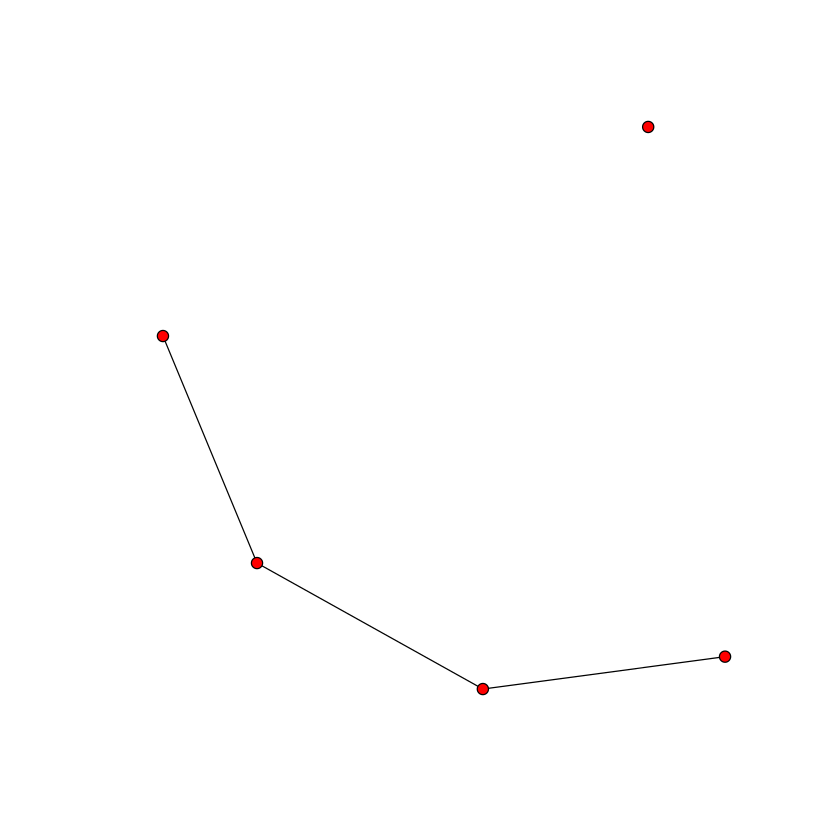

In [55]:
generator2.1(2,5)


[1] 0.8059701

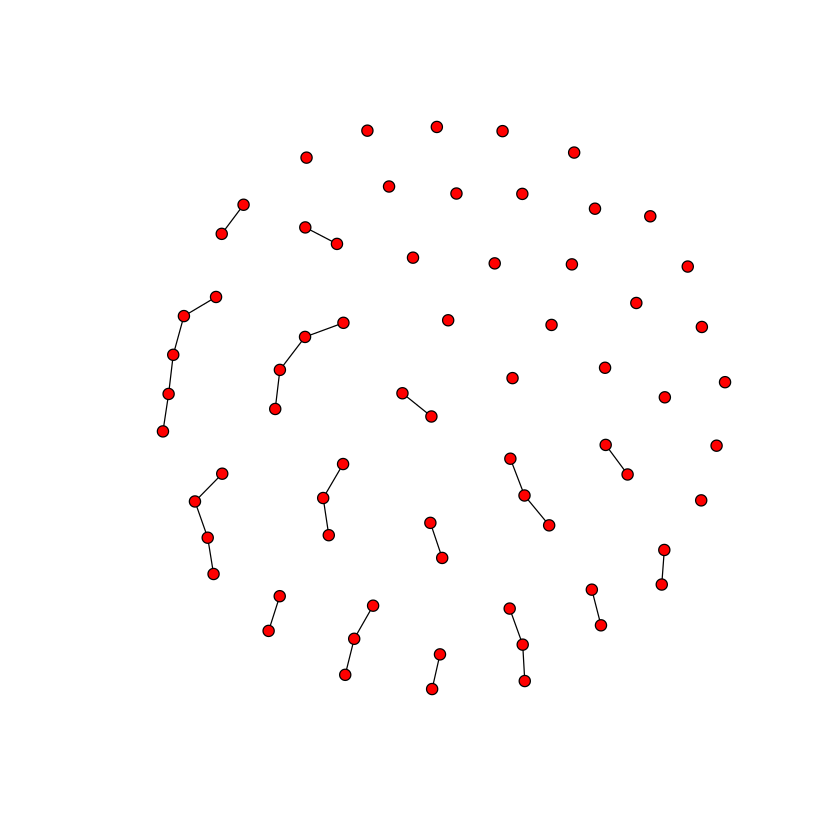

In [56]:
s=data.frame(generator2.1(1.8,67))
prome(grado(s),67)